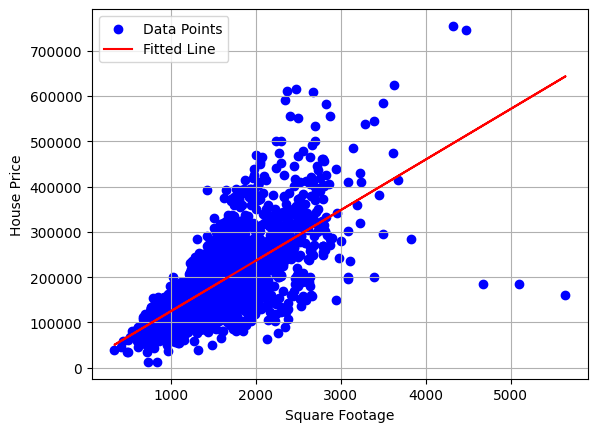

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
# From: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset
df = pd.read_csv('AmesHousing.xls')

# Select relevant columns
X = df[['Gr Liv Area']]  # Above grade (ground) living area square footage
y = df['SalePrice']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Display slope and offset from sklearn
display(model.coef_)
model.intercept_

array([111.69400086])

np.float64(13289.634364759637)

In [3]:
x = df['Gr Liv Area']

In [4]:
# Calculate slope using formula from AIMA book.  See that it agrees with slope
# calculated above with sklearn.
w1 = (len(x) * x.dot(y) - x.sum() * y.sum()) / (len(x) * x.dot(x) - x.sum()**2)
w1

np.float64(111.69400085780036)

In [6]:
# Calculate offset using formula from AIMA book.  See that it agrees with offset
# calculated above with sklearn.
w0 = (y.sum() - w1 * x.sum()) / len(x)
w0

np.float64(13289.634364759535)

In [9]:
# What is the total loss for these parameters?
sum((y_i - (w1* x_i + w0))**2 for x_i, y_i in zip(x, y))

np.float64(9354907186041.094)

In [23]:
# Calculate the losses for a range of w0 (y-intercept) values around the minimum loss value.
# This will enable a plot that will allow us to visually verify that the minimum
# value calculated was correct.
w0_array = np.arange(13289 - 500, 13289 + 500)
loss_array = [sum((y_i - (w1* x_i + w0))**2 for x_i, y_i in zip(x, y)) for w0 in w0_array]

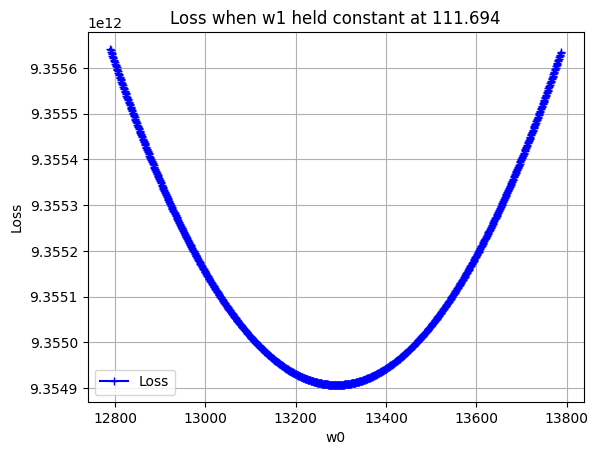

In [24]:
# Create a new figure and axes
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Plot on the new axes
ax.plot(w0_array, loss_array, 'b-+', label='Loss')
ax.set_xlabel('w0')
ax.set_ylabel('Loss')
ax.set_title('Loss when w1 held constant at 111.694')
ax.legend()
ax.grid(True)

plt.show()


In [25]:
# Calculate the losses for a range of w1 (slope) values around the minimum loss value.
# This will enable a plot that will allow us to visually verify that the minimum
# value calculated was correct.
w1_array = np.arange(111 - 20, 111 + 20)
w1_loss_array = [sum((y_i - (w1* x_i + w0))**2 for x_i, y_i in zip(x, y)) for w1 in w1_array]

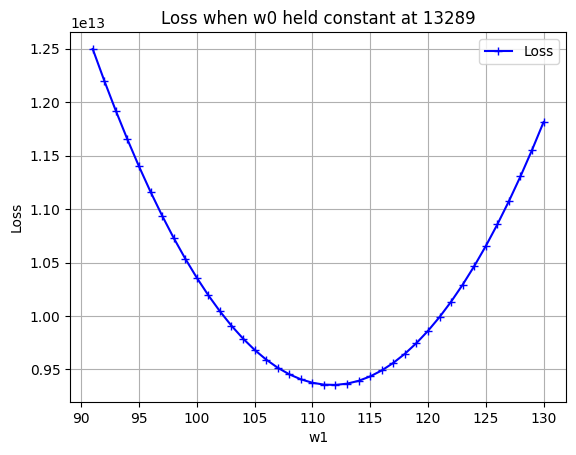

In [27]:
# Create a new figure and axes
w1_fig = plt.figure()
w1_ax = w1_fig.add_subplot(1, 1, 1)

# Plot on the new axes
w1_ax.plot(w1_array, w1_loss_array, 'b-+', label='Loss')
w1_ax.set_xlabel('w1')
w1_ax.set_ylabel('Loss')
w1_ax.set_title('Loss when w0 held constant at 13289')
w1_ax.legend()
w1_ax.grid(True)

plt.show()